In [1]:
# Importing Packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
print(tf.__version__)

1.13.1


In [3]:
print(keras.__version__)

2.2.4


In [4]:
# Object Creation
dataset = tf.keras.datasets.mnist

In [5]:
# Loading Dataset
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [6]:
# Normalizing Train-Data & Test-Data
X_train = keras.utils.normalize(X_train,axis=1)
X_test = keras.utils.normalize(X_test,axis=1)

In [7]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
# Flattening & Reshaping The Numpy Arrays 
X_train = X_train.flatten().reshape(60000,784)
X_test = X_test.flatten().reshape(10000,784)
Y_train = Y_train.reshape(60000,1).astype('float32')
Y_test = Y_test.reshape(10000,1).astype('float32')

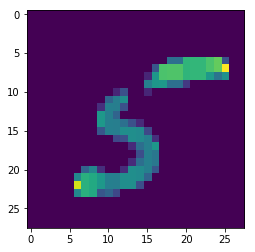

In [9]:
# Plotting Image Of any Random digit
plt.imshow(X_train[47].reshape(28,28))

In [10]:
# OneHot Encoding Y-train & Y_test
Enc = OneHotEncoder(sparse = False, categories = 'auto')
Y_train = Enc.fit_transform(Y_train)
Y_test = Enc.fit_transform(Y_test)

In [23]:
class Neural_Net:
    # Initializing Weights & Biases
    def __init__(self, Input_nodes, Hidden_nodes, Output_nodes):
        self.W_0_1 = np.random.normal(0,1,(Hidden_nodes, Input_nodes))
        self.B_0_1 = np.random.normal(0,1,(Hidden_nodes,1))
        self.W_1_2 = np.random.normal(0,1,(Output_nodes, Hidden_nodes))
        self.B_1_2 = np.random.normal(0,1,(Output_nodes, 1))
    
    # Calculating value of sigmoid
    def Sigmoid(self, Z):
        return (1/(1+(np.exp(-Z))))
    
    # Calculating value of softmax
    def Softmax(self, Z):
        return ((np.exp(Z))/(np.exp(Z).sum()))
    
    # Predicting Values for a 2 Layer Neural Network (1 Hidden Layer + Output Layer)
    def Predict(self, X):
        self.Z1 = (self.W_0_1 @ X.T) + self.B_0_1
        self.A1 = self.Sigmoid(self.Z1)
        self.Z2 = (self.W_1_2 @ self.A1) + self.B_1_2
        self.A2 = self.Softmax(self.Z2)
        return self.A2.T
    
    # Training The Network for 2 Layer
    def Train(self, X_train, Y_train, Epochs, Batch_size, Alpha):
        e = Epochs
        while e>0:
            itr = (X_train.shape[0]) // Batch_size
            for i in range(itr):
                # Forward Propogation
                X = X_train[(Batch_size*i):(Batch_size*(i+1))]
                Y = Y_train[(Batch_size*i):(Batch_size*(i+1))].T
                self.Z1 =  (self.W_0_1 @ (X.T)) + self.B_0_1
                self.A1 = self.Sigmoid(self.Z1)
                self.Z2 = (self.W_1_2 @ self.A1) + self.B_1_2
                self.A2 = self.Softmax(self.Z2)
                
                self.A1_t = self.A1.T
                self.A2_t = self.A2.T
                
                if i == 0:
                    Predictions = np.array(self.A2_t)
                else:
                    Predictions = np.vstack((Predictions,self.A2_t))
                
                # Loss Calculation
                L = (Y.T * np.log(self.A2_t)).sum()
                Loss = -(1/Batch_size) * L
                    
                # Calculate Gradients
                dloss_B_1_2 = -(Y * (1 - self.A2))
                dloss_W_1_2 = dloss_B_1_2 @ self.A1.T
                dloss_B_0_1 = ((dloss_B_1_2.T @ self.W_1_2) * self.A1_t * (1 - self.A1_t)).T
                dloss_W_0_1 = dloss_B_0_1 @ X
                    
                # Backpropogation
                self.W_0_1 = self.W_0_1 - Alpha * dloss_W_0_1
                self.B_0_1 = self.B_0_1 - Alpha * dloss_B_0_1
                self.W_1_2 = self.W_1_2 - Alpha * dloss_W_1_2
                self.B_1_2 = self.B_1_2 - Alpha * dloss_B_1_2
                            
            # Calculate Overall Loss
            L_train = (Y_train * np.log(Predictions)).sum()
            Train_loss = -(1/Y_train.shape[0]) * L_train
            
            Y_train_Orig = np.argmax(Y_train, axis=1)
            Y_train_Predict = np.argmax(Predictions, axis=1)
            
            print("Epoch",Epochs-e+1,"    loss:",Loss,"    accuracy:",accuracy_score(Y_train_Orig,Y_train_Predict), "\n")
            
            e = e - 1
    
    # Testing the Neural Network
    def Test(self, X_test, Y_test, Batch_size):
        itr = (X_test.shape[0]) // Batch_size
        for i in range(itr):
            X = X_test[(Batch_size*i):(Batch_size*(i+1))]
            Y_pred = self.Predict(X)
            
            if i == 0:
                Y_predicted = np.array(Y_pred)
            else:
                Y_predicted = np.vstack((Y_predicted,Y_pred))
        
        L_test = (Y_test * np.log(Y_predicted)).sum()
        Test_loss = -(1/Y_test.shape[0]) * L_test
        
        Y_test_Orig = np.argmax(Y_test, axis=1)
        Y_test_Predict = np.argmax(Y_predicted, axis=1)
        
        print(classification_report(Y_test_Orig,Y_test_Predict))
        print(confusion_matrix(Y_test_Orig,Y_test_Predict))
        print("loss:",Test_loss, "accuracy:",accuracy_score(Y_test_Orig,Y_test_Predict))

In [40]:
# Taking Input From User
I_nodes = int(input("Enter the number of nodes in input layer: "))
H_nodes = int(input("Enter the number of nodes in 1st hidden layer: "))
O_nodes = int(input("Enter the number of nodes in output layer: "))
E = int(input("Enter the number of epochs: "))
B_size = int(input("Enter the batch size: "))
Learning_rate = float(input("Enter the learning rate: "))
NN = Neural_Net(I_nodes, H_nodes, O_nodes)

Enter the number of nodes in input layer: 784
Enter the number of nodes in 1st hidden layer: 256
Enter the number of nodes in output layer: 10
Enter the number of epochs: 3
Enter the batch size: 1
Enter the learning rate: 0.0001


In [41]:
NN.Train(X_train, Y_train, E, B_size, Learning_rate)

Epoch 1     loss: 8.969671845724356     accuracy: 0.13695 

Epoch 2     loss: 9.92350691443361     accuracy: 0.32776666666666665 

Epoch 3     loss: 8.491644460525354     accuracy: 0.4568 



In [42]:
NN.Test(X_test, Y_test, B_size)

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       980
           1       0.92      0.53      0.68      1135
           2       0.30      0.50      0.38      1032
           3       0.29      0.56      0.39      1010
           4       0.53      0.48      0.51       982
           5       0.60      0.45      0.51       892
           6       0.78      0.50      0.61       958
           7       0.61      0.54      0.57      1028
           8       0.33      0.44      0.37       974
           9       0.58      0.46      0.51      1009

   micro avg       0.50      0.50      0.50     10000
   macro avg       0.59      0.49      0.52     10000
weighted avg       0.59      0.50      0.52     10000

[[460   0 206 198  12  39  15   8  24  18]
 [  0 605  64 187   6   9   0   1 263   0]
 [  6  13 521 189  62   9   9  12 201  10]
 [  5   2 194 570   6  48   2  22 160   1]
 [  1   1  84 137 475  29  66  34  20 135]
 [ 17   4  94 161  41 397 